In [1]:
import numpy
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision.transforms import ToTensor
from torch import nn
from torch.utils.data import DataLoader

In [2]:
data = torchvision.datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

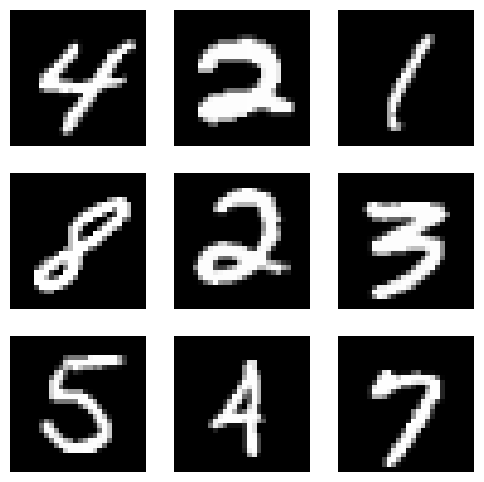

In [4]:
figure = plt.figure(figsize=(6,6))
cols, rows = 3, 3
for i in range(1, cols*rows + 1):
    sample_index = torch.randint(len(data), size=(1,)).item()
    img, label = data[sample_index]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [5]:
data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [43]:
class Autoencoder(nn.Module):

    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 36),
            nn.ReLU(),
            nn.Linear(36, 18),
            nn.ReLU(),
            nn.Linear(18, 9)
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(9, 18),
            nn.ReLU(),
            nn.Linear(18, 36),
            nn.ReLU(),
            nn.Linear(36, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        code = self.encoder(x)
        output = self.decoder(code)
        return output

In [7]:
learning_rate = 1e-1
batch_size = 32
epochs = 30
AE = Autoencoder()

In [8]:
loss_fn = nn.MSELoss()

In [9]:
#optimizer = torch.optim.SGD(ae.parameters(), lr=learning_rate, momentum=momentum)
optimizer = torch.optim.Adam(AE.parameters(),
                             lr = learning_rate,
                             weight_decay = 1e-8)
DL = DataLoader(data, batch_size=batch_size, shuffle=True)

Epoch  0
[ 4 21 27 14]


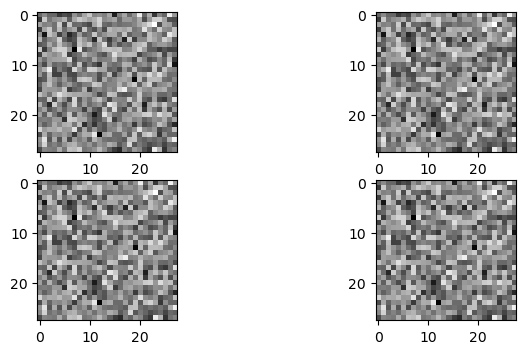

tensor(0.2328)
Epoch  1
[ 6  4 23  7]


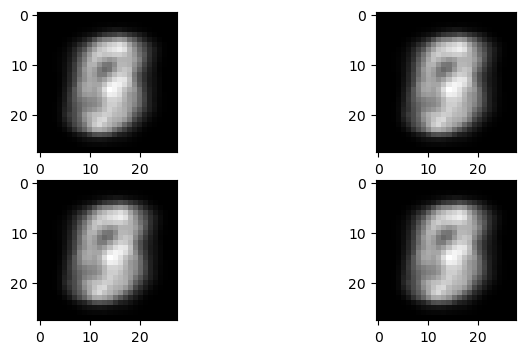

tensor(0.0688)
Epoch  2
[30 31  2 26]


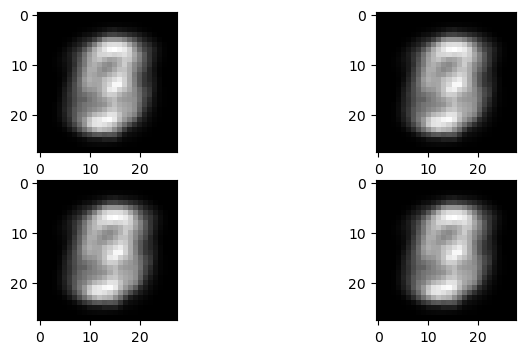

tensor(0.0730)
Epoch  3
[25  3 11 16]


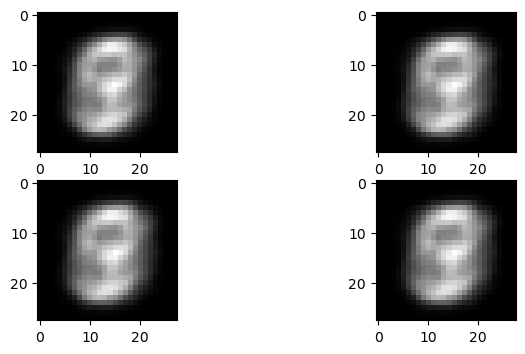

tensor(0.0641)
Epoch  4
[10 15 15 13]


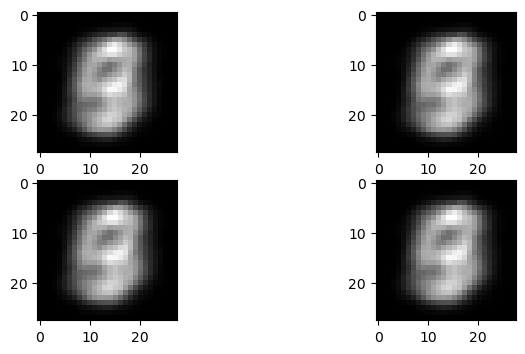

tensor(0.0602)
Epoch  5
[ 9 18  0  0]


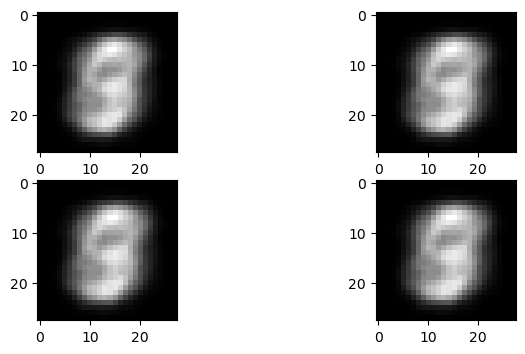

tensor(0.0656)
Epoch  6
[ 8 19 11 11]


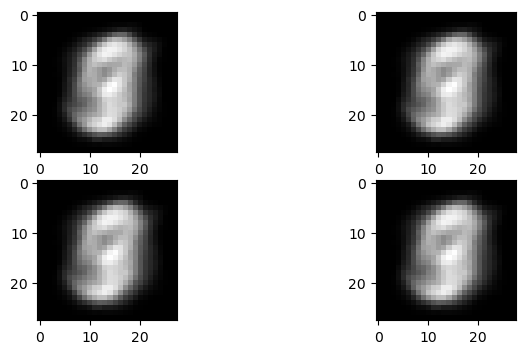

tensor(0.0699)
Epoch  7
[ 4 27 24 12]


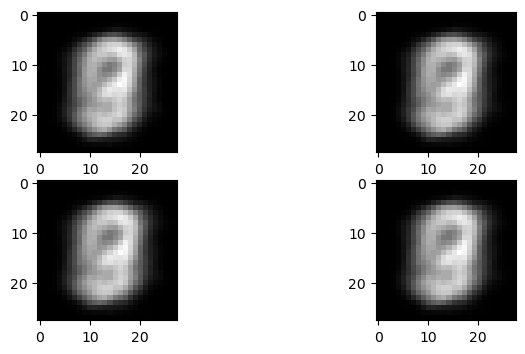

tensor(0.0614)
Epoch  8
[11 24 22  3]


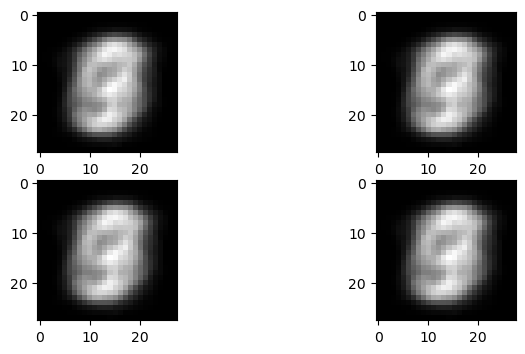

tensor(0.0639)
Epoch  9
[ 5 29 26 29]


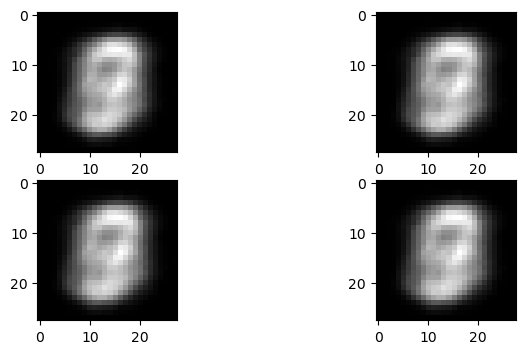

tensor(0.0650)
Epoch  10
[ 1 10 23 22]


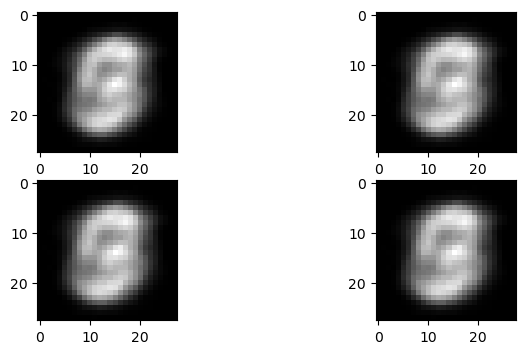

tensor(0.0671)
Epoch  11
[23  4  4 13]


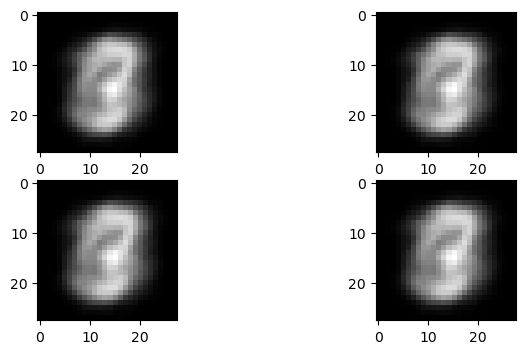

tensor(0.0618)
Epoch  12
[13 11 21  8]


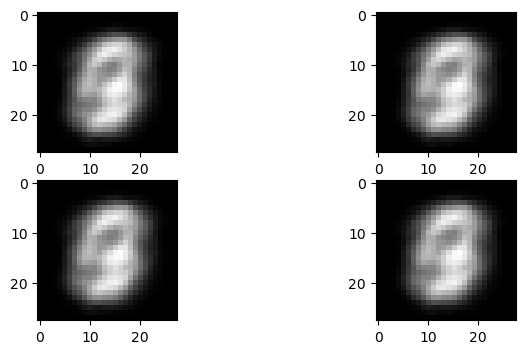

tensor(0.0703)
Epoch  13
[24 21 25 18]


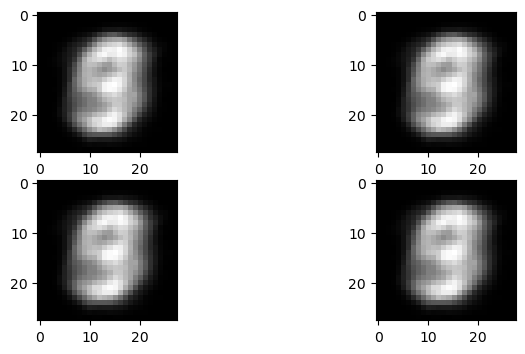

tensor(0.0639)
Epoch  14
[ 3  2 29  0]


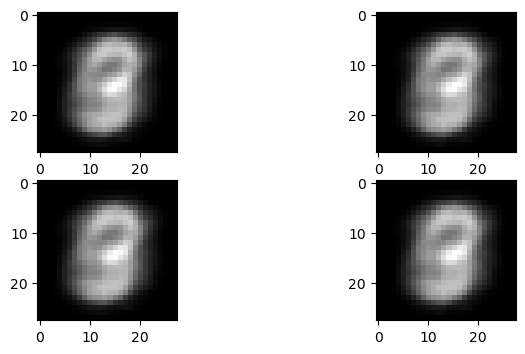

tensor(0.0627)
Epoch  15
[24 10 25 11]


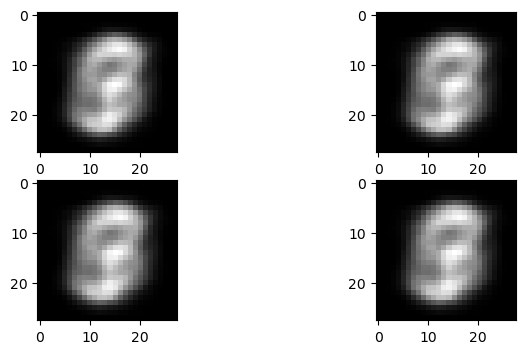

tensor(0.0664)
Epoch  16
[10 17 13 15]


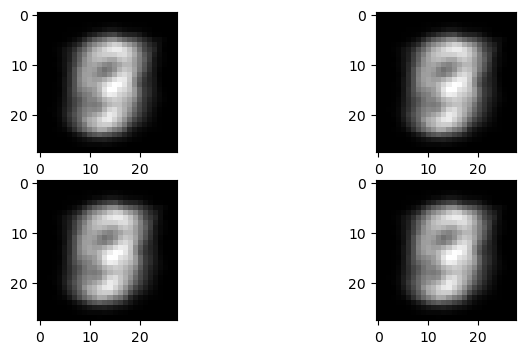

tensor(0.0634)
Epoch  17
[ 3 17 26  5]


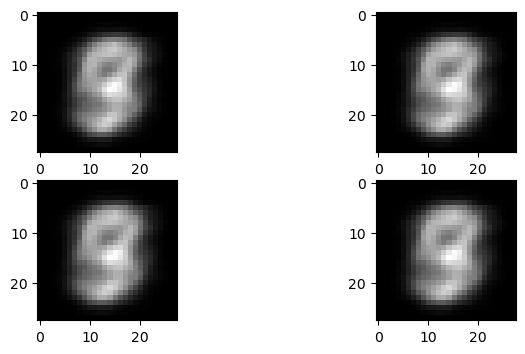

tensor(0.0674)
Epoch  18
[14  3 18 21]


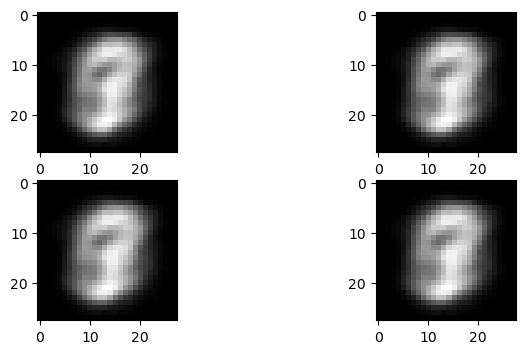

tensor(0.0701)
Epoch  19
[27  9 14 27]


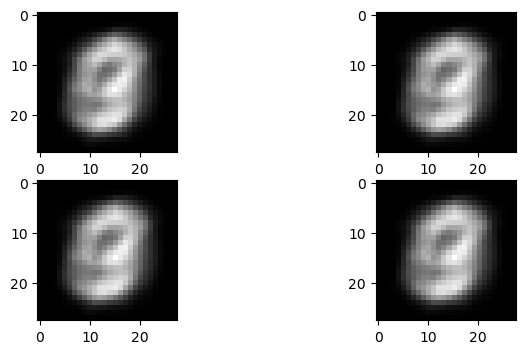

tensor(0.0630)
Epoch  20
[19  4 22 18]


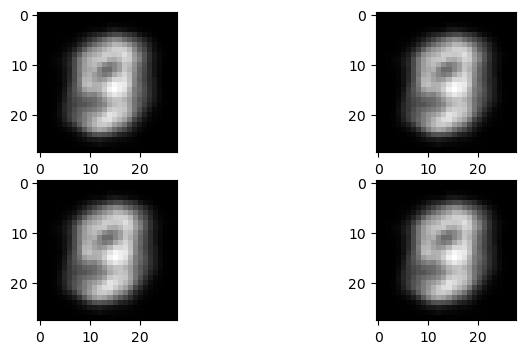

tensor(0.0707)
Epoch  21
[20 28 15 17]


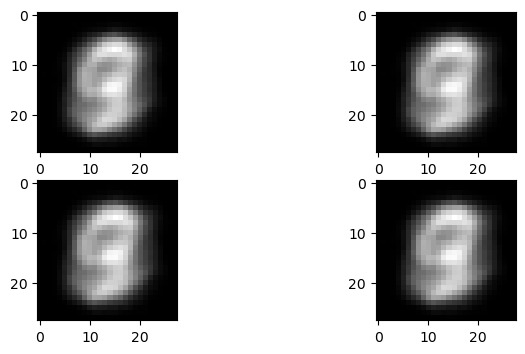

tensor(0.0656)
Epoch  22
[16  9 16  0]


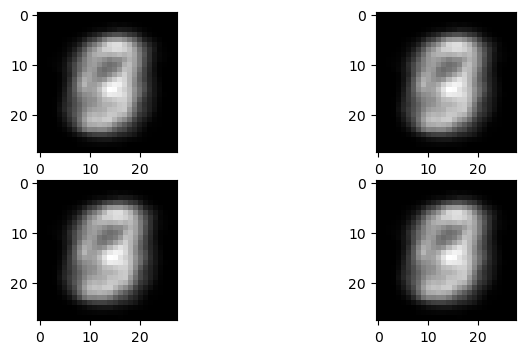

tensor(0.0675)
Epoch  23
[12 10 14 20]


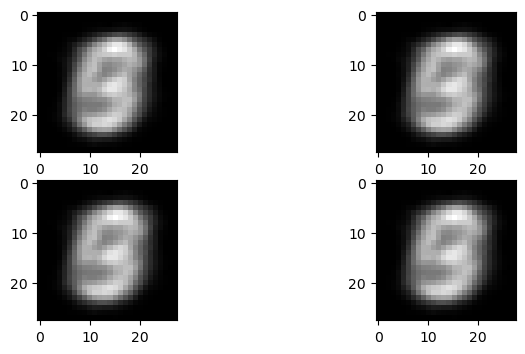

tensor(0.0724)
Epoch  24
[31  2 13  1]


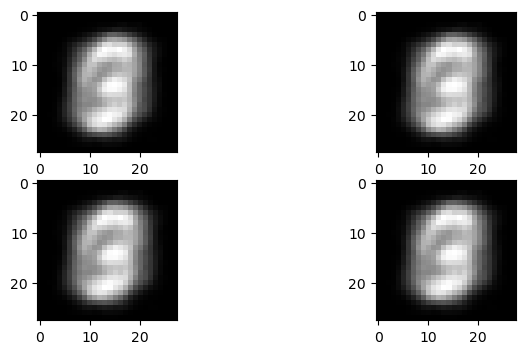

tensor(0.0643)
Epoch  25
[23 28 23  4]


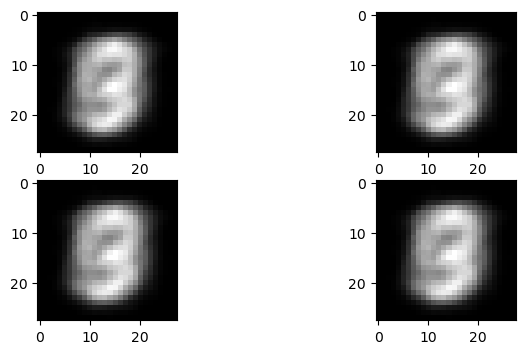

tensor(0.0650)
Epoch  26
[16 24 13 25]


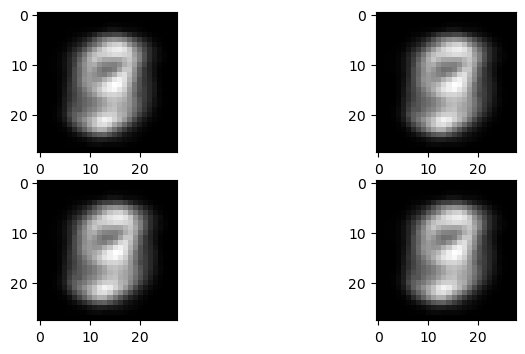

tensor(0.0674)
Epoch  27
[ 7 19 11  9]


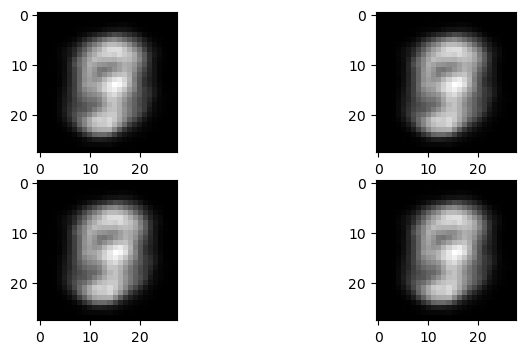

tensor(0.0642)
Epoch  28
[29 31 28  5]


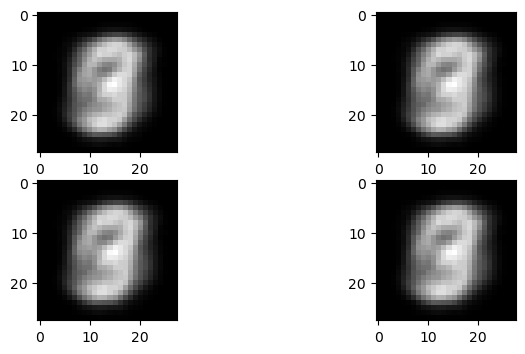

tensor(0.0675)
Epoch  29
[26 31 26 18]


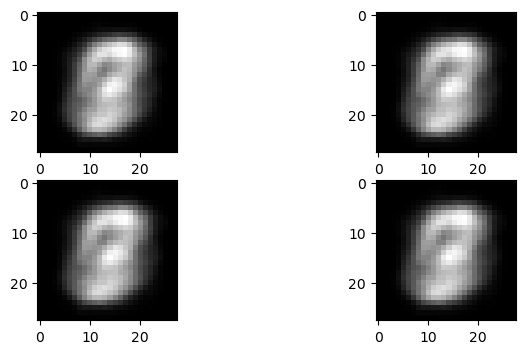

tensor(0.0672)


In [10]:
# Training loop
losses = []
for epoch in range(epochs):
    plot = True
    for (image, _) in DL:

        # Reshape image for input
        # torch.Size([32, 1, 28, 28])
        image = image.reshape(-1, 784)
        # torch.Size([32, 784])

        # Feed through the network
        reconstruction = AE(image)

        # Calculate loss function
        loss = loss_fn(reconstruction, image)
        losses.append(loss.detach())

        if plot==True:
            fig = plt.figure(figsize=(8,4))
            print('Epoch ', epoch)
            recon_plot = reconstruction.detach().reshape(-1, 28, 28)
            indices = numpy.random.choice(32, 4)
            print(indices)
            for i, ind in enumerate(indices):
                ax = fig.add_subplot(2,2,i+1)
                ax.imshow(recon_plot[ind], cmap='gray')
            
            plt.show()
            print(losses.pop())
            plot=False


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        

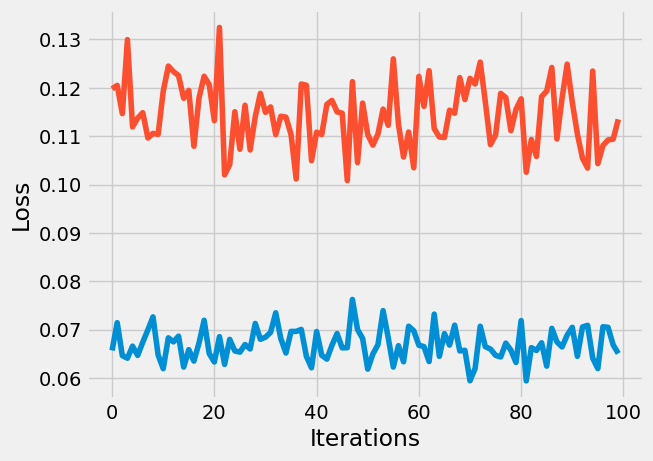

In [11]:
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses[-100:])
plt.plot(losses[:100])

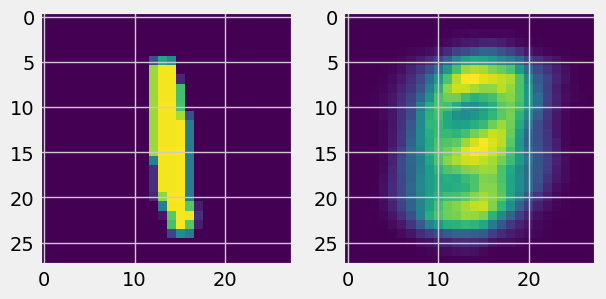

In [44]:
sample_index = torch.randint(len(data), size=(1,)).item()
img, label = data[sample_index]
img = img.reshape(-1, 784)
reconstructed_img = AE(img).reshape(-1, 28, 28)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img.squeeze().reshape(28,28))
ax2.imshow(reconstructed_img.detach().squeeze())